# A Linear Model for Bulldozers

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

In [6]:
set_plot_sizes(12,14,16)

## Load in our data from last lesson

In [7]:
PATH = "data/bulldozers/"

df_raw = pd.read_feather('tmp/raw')

In [10]:
df_raw['age'] = df_raw.saleYear-df_raw.YearMade

In [11]:
df, y, nas, mapper = proc_df(df_raw, 'SalePrice', max_n_cat=10, do_scale=True)

In [12]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df)-n_valid
y_train, y_valid = split_vals(y, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [13]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

# Linear regression for Bulldozers

## Data scaling

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalesID,401125.0,3.147483e-15,1.000001,-0.858580,-0.551518,-0.308344,0.355322,4.855369
MachineID,401125.0,2.895953e-15,1.000001,-2.761738,-0.292989,0.139657,0.567277,2.876309
ModelID,401125.0,-1.300773e-13,1.000001,-1.102854,-0.583548,-0.367372,0.294819,4.871330
datasource,401125.0,-6.855920e-13,1.000001,-1.524823,-0.297450,-0.297450,0.148868,4.165727
auctioneerID,401125.0,-1.064768e-13,1.000001,-0.381738,-0.321407,-0.261075,-0.140412,5.591096
YearMade,401125.0,6.797770e-16,1.000001,-3.081446,0.294188,0.328458,0.345593,0.390145
MachineHoursCurrentMeter,401125.0,8.635210e-14,1.000001,-0.074396,-0.074396,-0.074396,-0.074396,150.038499
fiModelDesc,401125.0,1.673709e+03,1263.331163,1.000000,631.000000,1395.000000,2292.000000,4999.000000
fiBaseModel,401125.0,5.591654e+02,469.310266,1.000000,206.000000,406.000000,704.000000,1950.000000
fiSecondaryDesc,401125.0,3.668504e+01,38.228243,0.000000,0.000000,29.000000,57.000000,175.000000


In [15]:
X_train, X_valid = split_vals(df, n_trn)

In [16]:
m = LinearRegression().fit(X_train, y_train)
m.score(X_valid, y_valid)

0.31399415664841568

In [17]:
m.score(X_train, y_train)

0.60966668735322171

In [18]:
preds = m.predict(X_valid)

In [19]:
rmse(preds, y_valid)

0.6197833720320716

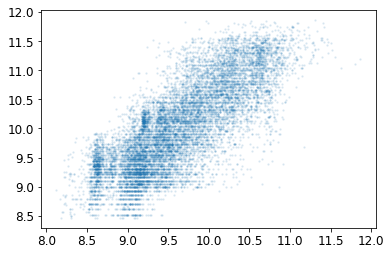

In [20]:
plt.scatter(preds, y_valid, alpha=0.1, s=2);

## Feature selection from RF

In [204]:
keep_cols = list(np.load('tmp/keep_cols.npy'))
', '.join(keep_cols)

'YearMade, Coupler_System, ProductSize, fiProductClassDesc, ModelID, Hydraulics_Flow, saleElapsed, fiSecondaryDesc, Enclosure, fiModelDesc, SalesID, fiModelDescriptor, MachineID, ProductGroupDesc, ProductGroup, Drive_System, Hydraulics, state, saleDay, Tire_Size, saleDayofyear'

In [205]:
df_sub = df_raw[keep_cols+['age', 'SalePrice']]

In [206]:
df, y, mapper, nas = proc_df(df_sub, 'SalePrice', max_n_cat=10, do_scale=True)

In [207]:
X_train, X_valid = split_vals(df, n_trn)

In [208]:
m = LinearRegression().fit(X_train, y_train)
m.score(X_valid, y_valid)

0.67602943126238957

In [209]:
rmse(m.predict(X_valid), y_valid)

0.42592074374245537

In [210]:
from operator import itemgetter

In [211]:
sorted(list(zip(X_valid.columns, m.coef_)), key=itemgetter(1))

[('saleElapsed', -145.64883869187287),
 ('ProductSize_Compact', -0.54007475122954363),
 ('ProductSize_Mini', -0.50048058229134851),
 ('Drive_System_Two Wheel Drive', -0.26738317785805954),
 ('ProductGroupDesc_Skid Steer Loaders', -0.24922453667794642),
 ('ProductGroup_SSL', -0.24922453667794109),
 ('Enclosure_None or Unspecified', -0.24279691741993142),
 ('Enclosure_nan', -0.18422637193293984),
 ('Drive_System_nan', -0.17481049937861393),
 ('Hydraulics_Flow_Standard', -0.16350014357513842),
 ('Enclosure_EROPS AC', -0.13844787814745835),
 ('Enclosure_OROPS', -0.11883972857575564),
 ('ProductSize_nan', -0.091923065651293712),
 ('MachineID', -0.074919067087428459),
 ('Drive_System_Four Wheel Drive', -0.070763049128190758),
 ('Enclosure_EROPS', -0.054481426247864562),
 ('Hydraulics_Flow_High Flow', -0.04086147315765426),
 ('ProductGroupDesc_Track Type Tractors', -0.0040345196773952097),
 ('ProductGroup_TTT', -0.0040345196773863279),
 ('Coupler_System_nan', -0.0033786325283386986),
 ('Tire_

In [212]:
m = LassoCV().fit(X_train, y_train)
m.score(X_valid, y_valid)

0.634974200475658

In [213]:
rmse(m.predict(X_valid), y_valid)

0.452103421164379

In [214]:
m.alpha_

0.015888143202334452

In [215]:
coefs = sorted(list(zip(X_valid.columns, m.coef_)), key=itemgetter(1))
coefs

[('ProductSize_Mini', -0.32283011739021739),
 ('ProductGroupDesc_Skid Steer Loaders', -0.29197866480532003),
 ('ProductSize_nan', -0.16481153369955914),
 ('Enclosure_OROPS', -0.10072067167233209),
 ('MachineID', -0.077025231732003333),
 ('age', -0.07146167736242677),
 ('saleDayofyear', -0.005420434471588245),
 ('ProductGroup_SSL', -0.00026018612542580649),
 ('state', -0.00020510032574012273),
 ('ModelID', -0.0),
 ('saleElapsed', -0.0),
 ('SalesID', -0.0),
 ('Hydraulics', -0.0),
 ('saleDay', -0.0),
 ('Coupler_System_None or Unspecified', -0.0),
 ('Coupler_System_Yes', -0.0),
 ('ProductSize_Compact', -0.0),
 ('ProductSize_Large', 0.0),
 ('ProductSize_Medium', 0.0),
 ('ProductSize_Small', 0.0),
 ('Hydraulics_Flow_High Flow', -0.0),
 ('Hydraulics_Flow_None or Unspecified', 0.0),
 ('Hydraulics_Flow_Standard', -0.0),
 ('Hydraulics_Flow_nan', 0.0),
 ('Enclosure_EROPS', 0.0),
 ('Enclosure_EROPS AC', -0.0),
 ('Enclosure_NO ROPS', 0.0),
 ('Enclosure_None or Unspecified', -0.0),
 ('Enclosure_nan'

In [216]:
skip = [n for n,c in coefs if abs(c)<0.01]

In [217]:
df.drop(skip, axis=1, inplace=True)

# for n,c in df.items():
#     if '_' not in n: df[n+'2'] = df[n]**2

In [218]:
X_train, X_valid = split_vals(df, n_trn)

In [219]:
m = LassoCV().fit(X_train, y_train)
m.score(X_valid, y_valid)

0.63678168860529394

In [220]:
rmse(m.predict(X_valid), y_valid)

0.4509826980922721

In [221]:
coefs = sorted(list(zip(X_valid.columns, m.coef_)), key=itemgetter(1))
coefs

[('ProductSize_Mini', -0.77420353132504083),
 ('ProductSize_nan', -0.37649627504627403),
 ('ProductGroupDesc_Skid Steer Loaders', -0.31232507784064917),
 ('MachineID', -0.092899281127635194),
 ('Enclosure_OROPS', -0.034526809361612412),
 ('age', -0.024367657576137017),
 ('ProductSize_Large / Medium', 0.08968235308777571),
 ('YearMade', 0.15983396599807115),
 ('Enclosure_EROPS w AC', 0.40652833657308551),
 ('Coupler_System_nan', 0.42191856864836064),
 ('ProductGroupDesc_Motor Graders', 0.49456961585974812)]

In [222]:
np.savez(f'{PATH}tmp/regr_resid', m.predict(X_train), m.predict(X_valid))